In [1]:
import parameter
import query 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

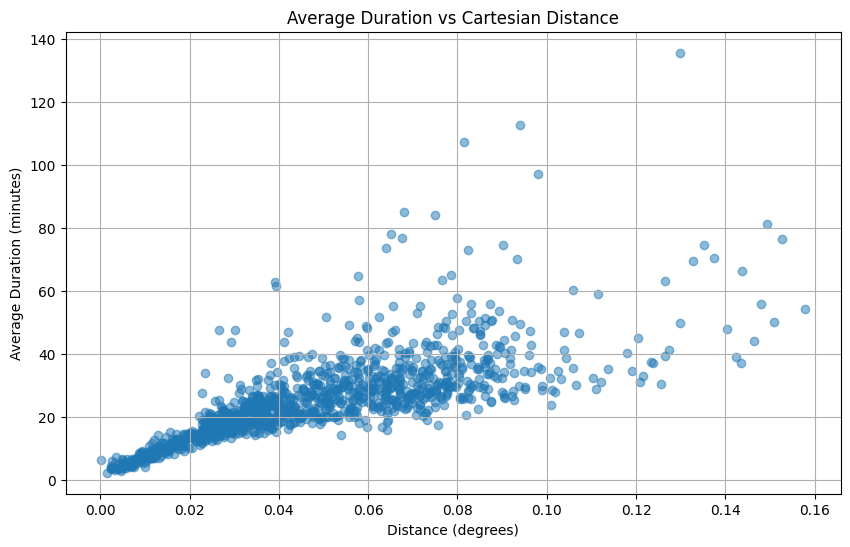

In [8]:
df = pd.read_csv('by_station/1 Ave & E 6 st.csv', low_memory=False)
df.dropna(inplace=True)
stations = df['end_station_name'].unique()
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60.0
df = df.loc[df['duration'] <= 200]
def calculate_distance(row):
    start_lat = row['start_lat']
    start_lng = row['start_lng']
    end_lat = row['end_lat']
    end_lng = row['end_lng']
    return np.sqrt((end_lat - start_lat)**2 + (end_lng - start_lng)**2)
df['distance'] = df.apply(calculate_distance, axis=1)
grouped = df.groupby('end_station_id').agg({'duration': 'mean', 'distance': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(grouped['distance'], grouped['duration'], alpha=0.5)
plt.title('Average Duration vs Cartesian Distance')
plt.xlabel('Distance')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()
    